##### What are different types of Missing Data?

1. Missing Completely at Random, MCAR:
A variable is missing completely at random(MCAR) if the probability of being missing is the same for all the observations. When Data is MCAR, there is absolutely no relationship between the data missing and any other values, observed or missing, within the dataset. In other words, those missing data points are a random subset of the data. There is noting systemetic going on that makes some data more likely to be missing than other.   

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv(r'C:\Users\hp\Downloads\Titanic\titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


#### Missing Data not at Random(MNAR): Systematic missing values

There is absolutely some relationship between the data missing and any other values, observed or missing, within the dataset.

In [7]:
df['cabin_null']= np.where(df['Cabin'].isnull(),1,0)

In [8]:
df['cabin_null'].mean()

0.7710437710437711

In [9]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'cabin_null'],
      dtype='object')

In [10]:
df.groupby(['Survived'])['cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

##### Missing At Random

###### Men--- hide their salary
###### women--- hide their age

#### All the technique of handling, missing values

1. Mean/Median/Mode replacement
2. Random Sample Imputation
3. Capturing NAN values with a new feature
4. End of Distribution Imputation
5. Arbitrary Imputation
6. Frequent Categories Imputation

##### Mean/Median/Mode Replacement

when should we apply?Mean/Median imputaiton has the assumption that the data are missing completely at random(MCAR).We solve this by replacing the NAN with most frequent occurance of the variables.

In [11]:
df= pd.read_csv(r'C:\Users\hp\Downloads\Titanic\titanic.csv',usecols=['Age','Fare','Survived'])

In [12]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [13]:
### Lets go and see percetage of missing values
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [14]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)

In [15]:
median= df.Age.median() 
median

28.0

In [16]:
impute_nan(df,'Age',median)
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Age         714 non-null    float64
 2   Fare        891 non-null    float64
 3   Age_median  891 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 28.0 KB


In [18]:
print(df['Age'].std())
print(df['Age_median'].std())

14.526497332334044
13.019696550973194


In [19]:
%matplotlib inline

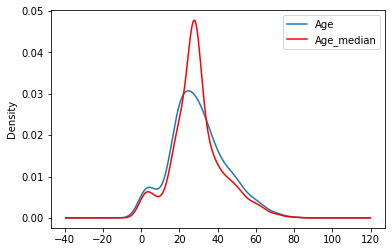

In [20]:
fig= plt.figure()
ax= fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax)
df.Age_median.plot(kind='kde',ax=ax,color='red')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

### Adavantages and Disadvantages of Mean/Median imputation

### Advantages
1. Easy to implement(Robust to outliers)
2. Faster way to obtain the complete dataset

### Disadvantages
1. Change of Distortion in the original variance
2. It impacts correlation

### Random Sample Imputation

##### Aim: Random Sample imputation consists of taking random observations from  the dataset and we use this observation to replace the nan values

#### When it should be used? It assumes that the data are missing completely at random(MCAR)

In [58]:
import pandas as pd

df= pd.read_csv(r'C:\Users\hp\Downloads\Titanic\titanic.csv',usecols=['Age','Fare','Survived'])

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Age       714 non-null    float64
 2   Fare      891 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 21.0 KB


In [60]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [61]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [62]:
df['Age'].isnull().sum()

177

In [63]:
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [64]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    ## It will have random sample to fill the na
    random_sample= df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ## Pandas need to have same index in order to merge the dataset
    random_sample.index= df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [65]:
median= df.Age.median()
median

28.0

In [66]:
impute_nan(df,'Age',median)

In [67]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


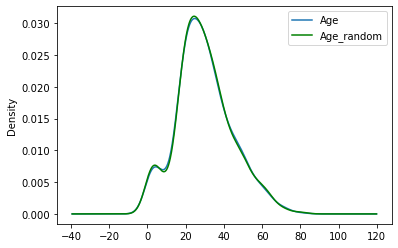

In [68]:
fig= plt.figure()
ax= fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax)
#df.Age_median.plot(kind='kde',ax=ax,color='red')
df.Age_random.plot(kind='kde',ax=ax,color='green')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

### Advantages
1. Easy to implement
2. There is less distortion in variable

### Disadvantages
1. Every situation randomness wont work

#### Capturing NAN values with a new feature

It works well if the data are not missing completely at random

In [32]:
import pandas as pd

df= pd.read_csv(r'C:\Users\hp\Downloads\Titanic\titanic.csv',usecols=['Age','Fare','Survived'])

In [33]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [34]:
df['Age_NAN']= np.where(df['Age'].isnull(),1,0)

In [35]:
df.tail()

,Survived,Age,Fare,Age_NAN
886,0,27.0,13.00,0
887,1,19.0,30.00,0
888,0,NaN,23.45,1
889,1,26.0,30.00,0
890,0,32.0,7.75,0


In [36]:
df.Age.mean()

29.69911764705882

In [37]:
df.Age.median()

28.0

In [38]:
df['Age'].fillna(df.Age.median(),inplace=True)

In [39]:
df.head(50)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


### Advantages
1. easy to implement
2. captures the importance of missing values

### Disadvantage
1. Creating Additional Features(Curse of dimensionality)

#### End Of Distribution Implementation

In [40]:
import pandas as pd

df= pd.read_csv(r'C:\Users\hp\Downloads\Titanic\titanic.csv',usecols=['Age','Fare','Survived'])

In [41]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


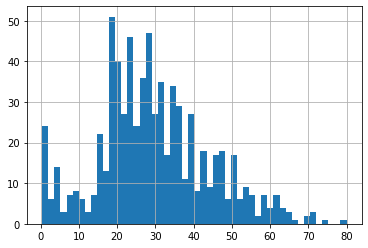

In [42]:
df.Age.hist(bins=50)

In [43]:
Extreme= df.Age.mean()+3*df['Age'].std()

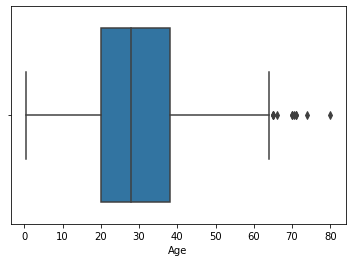

In [44]:
import seaborn as sns
sns.boxplot('Age',data=df)

In [45]:
def impute_nan(df,variable,median,Extreme):
    df[variable+"_end_distribution"]=df[variable].fillna(Extreme)
    df[variable].fillna(median,inplace=True)

In [46]:
impute_nan(df,'Age',df.Age.median(),Extreme)

In [47]:
df.head(50)

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
5,0,28.0,8.4583,73.27861
6,0,54.0,51.8625,54.00000
7,0,2.0,21.0750,2.00000
8,1,27.0,11.1333,27.00000
9,1,14.0,30.0708,14.00000


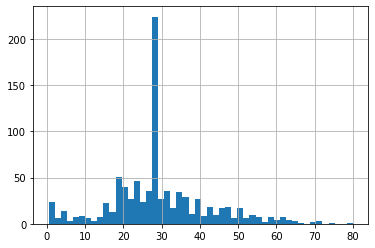

In [48]:
df['Age'].hist(bins=50)

In [70]:
df['Age_end_distribution'].mean()

KeyError: 'Age_end_distribution'

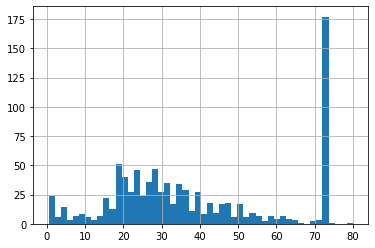

In [49]:
df['Age_end_distribution'].hist(bins=50)

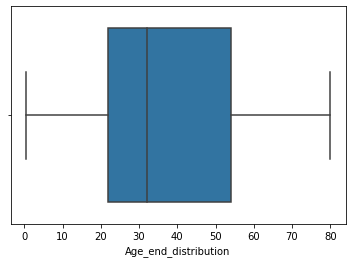

In [50]:
sns.boxplot('Age_end_distribution',data=df)

### Advantages
1. Easy to implement
2. capture the importance of missings if there is one

### Disadvantages
1. Distorts the original distribution of the variable
2. If missings is not important, it may mask the predictive power of the original variable by distorting its distribution
3. If the number of NA is big, it will mask true outliers in the distribution
4. If the number of NA is small, the replaced NA may be considered an outlier and pre-processed in a subsequent step of    feature engineering

### Arbitrary Value Imputation

this technique was derived from keggle competition
It consists of replacing NAN by Arbitrary value

In [51]:
import pandas as pd

df= pd.read_csv(r'C:\Users\hp\Downloads\Titanic\titanic.csv',usecols=['Age','Fare','Survived'])

In [52]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [53]:
def impute_nan(df,variable):
     df[variable+'_Zero']=df[variable].fillna(0)
     df[variable+'_hundred']=df[variable].fillna(100)

In [54]:
impute_nan(df,'Age')

In [55]:
df.head(50)

,Survived,Age,Fare,Age_Zero,Age_hundred
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
5,0,NaN,8.4583,0.0,100.0
6,0,54.0,51.8625,54.0,54.0
7,0,2.0,21.0750,2.0,2.0
8,1,27.0,11.1333,27.0,27.0
9,1,14.0,30.0708,14.0,14.0


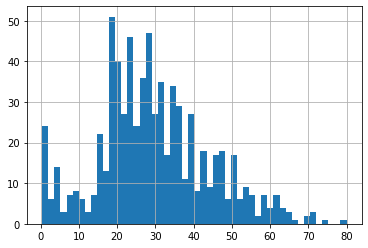

In [56]:
df['Age'].hist(bins=50)

 ### Arbitrary values
1. It should not be more frequently present

### Advantages
1. Easy to implement
2. Captures the importance of missings if there is one

### Dsiadvantages
1. Distorts the original distribution of the variable
2. If missingness is not important, it may mask the predictive power of the original variable by distorting its distribution
3. Hard to decide which value to use
